# Exploring Naive Bayes: Theory, Applications, and Performance Analysis

**Name**:  Conor Brooke  
**Student-ID**:  C00260735  
**Date**:  01/02/2024  
**Link To Original Notebook**:  [GitHub Repository](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb)  

  
## Notebook Overview
This notebook provides a in depth exploration of the Naive Bayes algorithm, a popular classification technique based on Bayes' Theorem. The notebook covers the theory behind Naive Bayes and demonstrates its application using different datasets, including the [dataset1] for image recognition and [dataset2] for email filtering. The main objectives of this analysis are to understand the mechanics of Naive Bayes, to apply it to different types of data, and to evaluate its performance in classification tasks.

## Modifications Log
- **[29/01/2024]**: Initial creation; modifications to intruduction and explanation of Naive Bayes Classification.

<br>

# CRISP-DM Project Log

## Business Understanding
- **Objective Definition**: _[Detail the specific objectives of this notebook, including the questions you aim to answer or the predictions you intend to make.]_
- **Project Requirements**: _[Summarize the key requirements from the project brief that this notebook addresses.]_

## Data Understanding
- **Initial Data Collection Report**: _[Describe the sources of your data, how it was collected, and any initial observations.]_
- **Data Description**: _[Provide a summary of the dataset(s) used, including size, features, and target variables.]_
- **Exploratory Data Analysis (EDA)**: _[Summarize the EDA conducted, including any interesting findings or patterns observed in the data.]_

## Data Preparation
- **Data Cleaning Steps**: _[Detail the data cleaning process, including handling of missing values, outliers, etc.]_
- **Feature Engineering and Selection**: _[Describe any new features created, features selected for the model, and the rationale behind these choices.]_
- **Data Splitting Methodology**: _[Explain how the data was split into training, validation, and test sets, including any strategies used to ensure balance or representativeness.]_

## Modeling
- **Model Selection**: _[Detail the machine learning algorithms considered and the reasons for selecting the final model(s).]_
- **Model Building and Tuning**: _[Describe the process of building the model, including any parameter tuning or cross-validation techniques used.]_
- **Modeling Challenges**: _[Discuss any challenges faced during modeling and how they were addressed.]_

## Evaluation
- **Evaluation Metrics Used**: _[Specify the metrics used to evaluate the model's performance and the rationale for their selection.]_
- **Model Performance Results**: _[Present the results of the model's performance on the training, validation, and test sets.]_
- **Model Interpretation**: _[Interpret the model's outcomes, including any insights gained from the model's predictions or errors.]_

## Deployment
- **Deployment Strategy**: _[Outline the approach for deploying the model, including any platforms, tools, or technologies used.]_
- **Challenges and Solutions**: _[Detail any challenges encountered during deployment and how they were resolved.]_
- **Future Work**: _[Discuss any potential improvements, additional features, or further research that could be conducted to enhance the project.]_



<br>
<br>

> **Note**: This notebook is part of my Data Science Continuous Assessment portfolio. It has been enhanced significantly from the original version cloned from GitHub to deepen both theoretical and practical understanding of the underlying machine learning algorithm(s). Each change is documented in the log above to track the evolution of the notebook and analyze the impact of modifications on the algorithm's performance.
  

<br>
<br>

## In Depth: Naive Bayes Classification

In this notebook, we will delve into an in-depth examination of various algorithms and datasets through the lens of Naive Bayes classification.

Naive Bayes models represent a collection of fast and simple classification algorithms that are often suitable in managing high-dimensional datasets. Their speed and minimal requirement for parameter tuning make them practical as an initial, benchmark for classification challenges. I will provide an intuitive explanation  of the mechanisms underpinning Naive Bayes classifiers, followed by practical demonstrations of their application across datasets.

## Bayesian Classification

Naive Bayes classifiers are a simple way to predict a category based on some features, using a principle called Bayesian classification. This method uses Bayes's theorem, a formula that helps us understand how likely something is, given certain conditions. In essence, it calculates the probability of a category (or label) given some observed features, we can write as $P(L~|~{\rm features})$.
  
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

### Basic Example

Suppose we want to predict the likelihood of getting lung cancer based on whether someone smokes.

**Features**: Smoking status (smoker or non-smoker).

**Label**: Lung cancer risk (high or low).

Let's apply Bayes' theorem to assess the risk of lung cancer based on smoking status with some hypothetical statistics.

- **Given Information**:
  - The overall probability of having lung cancer (P(Lung Cancer)) is 0.01, or 1% of the population.
  - The probability of being a smoker (P(Smoker)) is 0.2, or 20% of the population.
  - The probability of having lung cancer given that you are a smoker (P(Lung Cancer | Smoker)) is 0.02, or 2% of smokers have lung cancer.

We aim to determine the probability that an individual is a smoker, given they have been diagnosed with lung cancer. This is mathematically represented as \(P(\text{Smoker} | \text{Lung Cancer})\).

### Using Bayes' Theorem

Bayes' theorem allows us to compute this probability as follows:

$$
P(\text{Smoker} | \text{Lung Cancer}) = \frac{P(\text{Lung Cancer} | \text{Smoker}) \times P(\text{Smoker})}{P(\text{Lung Cancer})}
$$

**Plugging in the given values**:

$$
P(\text{Smoker} | \text{Lung Cancer}) = \frac{0.02 \times 0.2}{0.01}
$$

After performing the calculation:

$$
P(\text{Smoker} | \text{Lung Cancer}) = 0.4
$$

This means that among individuals diagnosed with lung cancer, there is a 40% probability that they are smokers, according to the provided sample statistics.


### Generative Model  

To make these predictions, we need a model that can guess the likelihood of the features given each possible category. This model, called a generative model, imagines how the data might be generated for each category. Training this model to make accurate guesses can be complex, but we simplify it by making some basic assumptions about the data's nature.

The simplification comes from the "naive" part of "naive Bayes." By assuming the features are independent (a naive assumption), we can more easily approximate how the data might be generated for each category. This approach allows for quick, rough predictions. There are different naive Bayes models, each based on different assumptions about the data, which we will explore further.

We begin with the standard imports:

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

#### Using Iris Dataset to demostrate Gaussian Naive Bayes

In [34]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Understanding Gaussian Naive Bayes

Gaussian Naive Bayes is the simplest type of Naive Bayes classifier. It works on the idea that the data for each category comes from a normal (or Gaussian) distribution. The Gaussian distribution, is a bell-shaped curve that describes how a set of data is spread out, with most values clustering around a central mean and fewer occurring as you move away.

Below is showing the Iris Dataset:

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)


Model accuracy on the test set: 100.00%


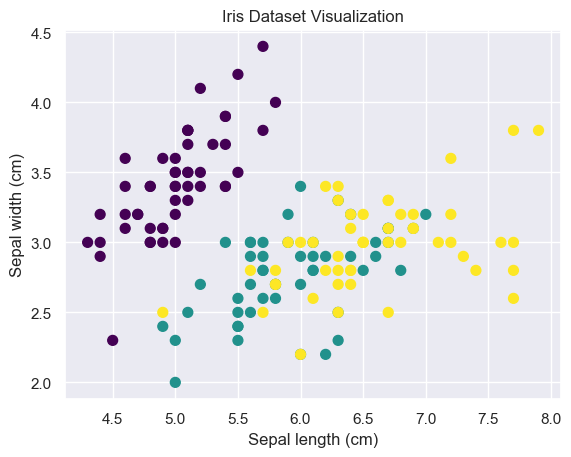

In [66]:
# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

# The scatter plot visualizes the Iris dataset based on its first two features.
# Each point represents an iris flower, with its position determined by the values of these two features.
# The color of the points corresponds to the actual species of the iris flower.
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Iris Dataset Visualization')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

### Explanation:
The accuracy measurement reflects how well the Gaussian Naive Bayes model has performed in classifying the iris flowers into their respective species based on the dataset's features. A higher accuracy percentage indicates a better match between the model's predictions and the actual species.

The scatter plot helps in visualizing the distribution of the iris species based on all features. Since there are four features, there must be four dimensions as well. This is difficult to show on a scatterplot, so I have implemented PCA below to better visualize the clusters.

In [70]:
# Apply PCA to reduce the data to 2 principal components for both training and visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Split the PCA-transformed dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes
model = GaussianNB()

# Train the model on the PCA-transformed data
model.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test set
y_pred_PCA = model.predict(X_test_pca)

Model accuracy on the test set with PCA: 93.33%


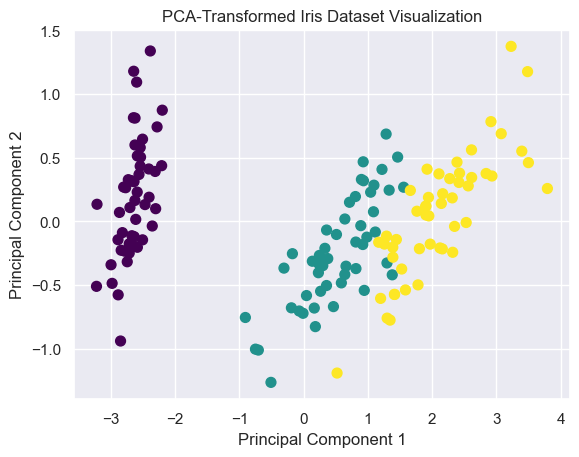

In [71]:

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred_PCA)
print(f"Model accuracy on the test set with PCA: {accuracy*100:.2f}%")

# Visualize the PCA-transformed Iris dataset
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, s=50, cmap='viridis')
plt.title('PCA-Transformed Iris Dataset Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Visualization of the Iris Dataset Using PCA

Principal Component Analysis (PCA) is a statistical technique used to simplify the complexity in high-dimensional data while retaining as much information as possible.

For the Iris dataset, which has four features, PCA helps us reduce these dimensions to the two most informative ones. This reduction enables us to visualize the dataset on a 2D plot, where each point represents an iris flower. By visualizing the data in this way, we can see how PCA helps in identifying patterns and clusters in complex datasets.

### Accuracy Problem
The reduction in accuracy could be beacuase the model trained on the full feature set might be overfitting to the noise in the training data, leading to higher accuracy on the test set used. In contrast, the PCA model, with reduced dimensionality, may generalize better but appear to perform worse if the test set closely resembles the training set or if the test set is small.


### Generate new, random data points to predict the decision boundary


In [95]:
rng = np.random.RandomState(0)

# Suggested parameters for generating new random data points
feature_min = [4.0, 2.0, 1.0, 0.1]  # Minimum values for each feature
feature_max = [8.0, 4.5, 7.0, 2.5]  # Maximum values for each feature

# Generate new random data points within the specified range
Xnew = [feature_min[i] + (feature_max[i] - feature_min[i]) * rng.rand(2000) for i in range(4)]
Xnew = np.column_stack(Xnew)  # Stack the features horizontall

ynew = model.predict(Xnew)

(-3.57477620216258, 4.14661788036981, -1.3979780043923657, 1.5061719006590186)

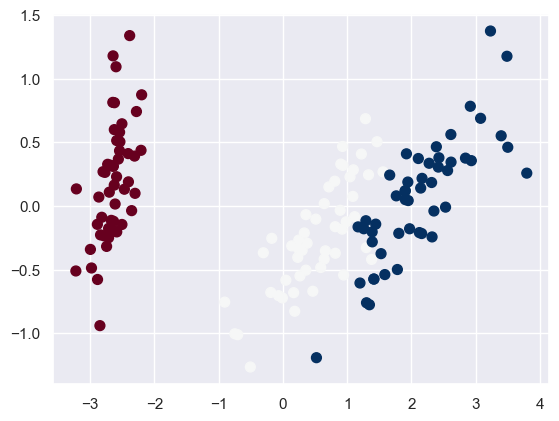

In [100]:
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, s=50, cmap='viridis')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='viridis', alpha=0.1)
plt.axis(lim)

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Here is a representative entry from the data:

In [ ]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

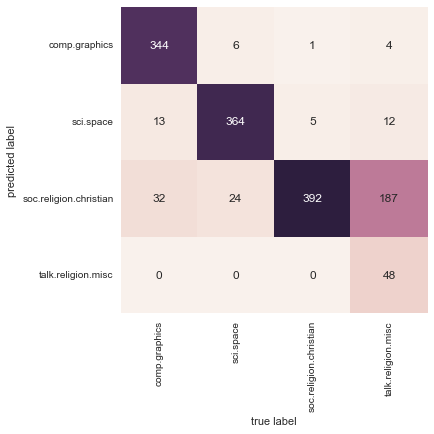

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.